# Generate Cosmic Muon Flux

The analytical cosmic ray spectrum is based on [Phys. Atom. Nuclei 69, 1293–1298 (2006)](https://link.springer.com/article/10.1134/S1063778806080047).
The analytical form considers cosmic rays from 1 GeV/c to $10^5$ GeV/c.

Eq (1) in this paper is in unit of /($cm^2\cdot s\cdot sr$).  If integrating p from 1 to 1e5 GeV/c, at $\theta$ =0, we get 0.0076 muons from Eq (1), corresponding to 76 muons/($m^2\cdot s\cdot sr$), which matches the text describing the vertical flux.

Finally ready to generate the cosmic muon flux according to this formula!  Use momentum, $\cos\theta$ (not $\theta$) as the variable

This notebook is copied from https://github.com/yuntsebaryon/SimpleCosmics/blob/main/Cosmics/GenCosmicFlux.ipynb, but uses slightly different settings (see below)

In [1]:
# for creating a responsive plot
%matplotlib widget
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
import scipy.integrate as integrate

In [2]:
rng = np.random.default_rng()

In [3]:
# Analytical cosmic ray flux from the paper
def dI_dpdcosth(costh, p):
    return 18/(p*costh+145)* (1./np.power(p+2.7/costh, 2.7))* (p+5)/(p+5/costh)

In [4]:
def getNSamples(xmin, xmax, N):
    return rng.uniform(xmin, xmax, N)

In [5]:
def isAccepted(n, vPDF, maxPDF):
    return rng.uniform(0., maxPDF, n) < vPDF

In [6]:
def rejectSampling(pmin, pmax, costhmin, costhmax, nSamples):
    outSamples = np.array([ (p, costh) for p, costh in 
                           zip(getNSamples(pmin, pmax, nSamples), getNSamples(costhmin, costhmax, nSamples)) ])
    outPDF = dI_dpdcosth(outSamples[:,1], outSamples[:,0])
    maxPDF = dI_dpdcosth(costhmax, pmin)

    mask = isAccepted(len(outSamples), outPDF, maxPDF)
    reject, = np.where(~mask)

    while reject.size > 0:
        fill = np.array([ (p, costh) for p, costh in
                        zip(getNSamples(pmin, pmax, reject.size), getNSamples(costhmin, costhmax, reject.size)) ])
        
        fillPDF = dI_dpdcosth(fill[:,1], fill[:,0])
        mask = isAccepted(len(fill), fillPDF, maxPDF)
        outSamples[reject[mask]] = fill[mask]
        reject = reject[~mask]

    return outSamples

In [7]:
nSamples = 50000000
voutSamples = rejectSampling(1., 2., 0.5, 1., nSamples)
len(voutSamples)

50000000

In [8]:
outHist = np.histogram2d(voutSamples[:,0], voutSamples[:,1], bins = [20, 10], range = [[1., 2.], [0.5, 1]])
voutSamples[:,0], outHist

(array([1.32720496, 1.51529562, 1.09403231, ..., 1.40639372, 1.81868276,
        1.76430728]),
 (array([[ 98785., 131454., 170024., 214313., 265978., 324583., 389261.,
          461499., 541659., 628017.],
         [ 96916., 129341., 166080., 209742., 258659., 315882., 377821.,
          448155., 523667., 605574.],
         [ 96114., 125897., 162787., 204843., 253321., 305995., 367798.,
          432581., 506282., 584118.],
         [ 93331., 124128., 159459., 199475., 246400., 297536., 355977.,
          420284., 489375., 564340.],
         [ 92010., 120967., 155752., 194831., 239497., 290322., 346526.,
          406346., 474059., 546227.],
         [ 90284., 119373., 151985., 190744., 233257., 281990., 335686.,
          394998., 459548., 526448.],
         [ 89216., 116686., 148830., 185714., 228318., 275030., 325852.,
          383531., 444729., 509806.],
         [ 87382., 114013., 145711., 182652., 222068., 266742., 317153.,
          372131., 430586., 492651.],
         [ 85486.

In [9]:
costh, p = np.meshgrid(outHist[2][0:-1], outHist[1][0:-1])
costh

array([[0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.

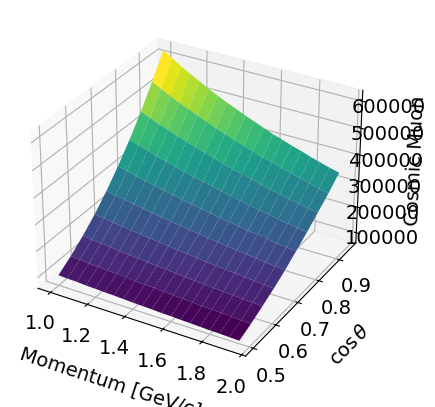

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
ax.plot_surface( p, costh, outHist[0], cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Cosmic Muon', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

# ax.set_xlim( [1, 2])
plt.show()

## Validation

Compare with the analytic form

In [15]:
# Find the center point of each bin 
cosRefBin = np.arange(0.525, 1.025, 0.05)
pRefBin = np.arange(1.025, 2.025, 0.05)
cosRef, pRef = np.meshgrid(cosRefBin, pRefBin)
# cosRef, pRef
# dI_dpdcosth(cosRef, pRef)
cosRef.size, len(pRef)

(200, 20)

In [16]:
# Normalization
norm = integrate.dblquad(dI_dpdcosth, 1., 2., 0.5, 1.)
f = outHist[0].sum()*1*0.5/norm[0]/(20*10)
f, outHist[0].sum(), norm[0]

(190157196.7986101, 50000000.0, 0.0006573508765612687)

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

formula = dI_dpdcosth(cosRef, pRef)*f
diff = (outHist[0] - formula)/formula
ax.plot_surface( p, costh, diff, cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Difference Raio', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

# ax.set_xlim( [1, 2])
fig.savefig('Residual.png')

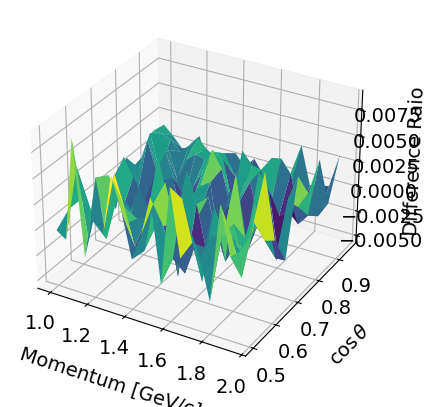

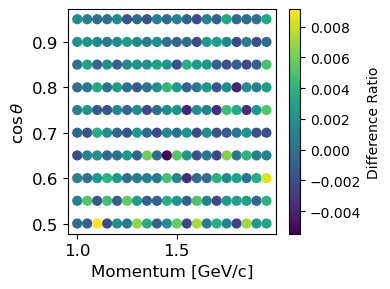

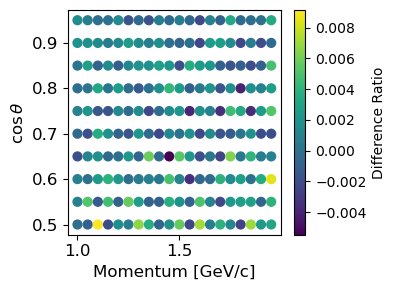

In [19]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )

sc = ax.scatter( p, costh, c = diff, marker = 'o', s = 40, cmap = 'viridis')
fig.colorbar(sc, ax = ax, label = r'Difference Ratio')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 12 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 12 )
# ax.set_zlabel( r'Difference', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

plt.show()

In [20]:
I = integrate.dblquad(dI_dpdcosth, 1., 10., 0., 1.)
I[0]*2*np.pi

0.01349223362627387

## Cosmic Muon Generation over the Entire Phase Space

In [22]:
nSamples = 50000000
pmins = np.array([1., 1., 2., 2., 4., 10.])
pmaxs = np.array([2., 2., 4., 4., 10., 10000.])
costhmins = np.array([0., 0.5, 0., 0.5, 0., 0.])
costhmaxs = np.array([0.5, 1., 0.5, 1., 1., 1.])

In [23]:
voutSamples = np.array([ rejectSampling(pmin, pmax, costhmin, costhmax, nSamples)
                        for pmin, pmax, costhmin, costhmax in zip(pmins, pmaxs, costhmins, costhmaxs) ])

In [24]:
voutSamples

array([[[ 1.939352  ,  0.41503603],
        [ 1.87231746,  0.36652659],
        [ 1.83699177,  0.19109679],
        ...,
        [ 1.81368312,  0.49188755],
        [ 1.59486359,  0.42628864],
        [ 1.00028218,  0.4495785 ]],

       [[ 1.34682664,  0.78644524],
        [ 1.64292671,  0.84204227],
        [ 1.31455852,  0.69375761],
        ...,
        [ 1.91815511,  0.99272058],
        [ 1.70281674,  0.94950998],
        [ 1.05870089,  0.93598451]],

       [[ 2.06608499,  0.4958836 ],
        [ 3.17036022,  0.39010721],
        [ 2.35253825,  0.43588134],
        ...,
        [ 2.88854686,  0.44787135],
        [ 3.19059193,  0.43609987],
        [ 3.24671291,  0.34604504]],

       [[ 2.83300179,  0.92218073],
        [ 3.65762479,  0.62281884],
        [ 2.8380814 ,  0.86894313],
        ...,
        [ 2.92882362,  0.85884602],
        [ 3.90486606,  0.58590362],
        [ 2.08811221,  0.67373465]],

       [[ 5.19578014,  0.70592413],
        [ 5.03648751,  0.9117971 ],
    

In [25]:
with open('CosmicFlux.npy', 'wb') as f:
    np.save(f, voutSamples)